
### Göğüs Kanseri Sınıflandırma


**İçerik:**
- Göğüs kanseri sınıflandırma
  - Veri seti ve problem tanımı
  - Veri Seti yükleme
  - Keşifsel-Açıklayıcı Veri Analizi
  - Aykırı Değer Tespiti ve Çıkarılması
  - Eğitim ve Test Veri Seti Bölünmesi
  - Standardizasyon
  - K-En Yakın Komşu
  - Temel Bileşenler Analizi
   

### Veri Seti ve Problem Tanımı

- Göğüs kanseri verilerini içeren bir veri seti kullanarak, iyi huylu ve kötü huylu kanser hücrelerini sınıflandırma problemi çözeceğiz.
- Veri setinde bulunan özellikler, bir göğüs kitlesinin iğne aspiratının dijitalleştirilmiş bir görüntüsünden hesaplanır.
- Veri setinde bulunan özellikler:
  - ID number
  - Diagnosis(M=malignant, B=benign) => (M=kötü huylu, B=iyi huylu)
  - Her hücre çekirdeği için on gerçek değerli özellik hesaplanır.
- Kayıp veri bulunmamaktadır.
- Sınıf dağılımı: 357 iyi huylu kanser hücresi, 212 kötü huylu kanser hücresi


**Veri-Seti-yükleme**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings("ignore")

In [2]:
veri=pd.read_csv("documentations/kanser.csv")
veri.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius3_mean,texture3_mean,perimeter3_mean,area3_mean,smoothness3_mean,compactness3_mean,concavity3_mean,concavepoints3_mean,symmetry3_mean,fractal3_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#gereksiz özellikleri çıkaralım.

veri.drop(["id"],inplace=True,axis=1)

In [4]:
#verinin içerisinde bulunan hastalık tanımı özelliğinin ismini değiştir.
veri=veri.rename(columns={"diagnosis":"hedef"})



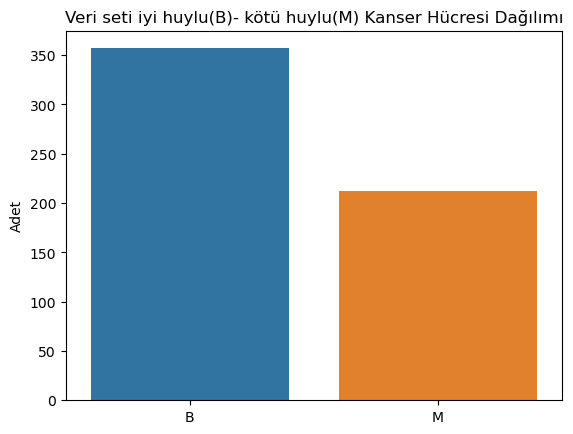

B    357
M    212
Name: hedef, dtype: int64


In [5]:
#veri içerisinde bulunan hastalık dağılımına bakalım
hedef_sayisi=veri.hedef.value_counts()

plt.figure()
sns.barplot(x=hedef_sayisi.index,y=hedef_sayisi.values)
plt.ylabel("Adet")
plt.title("Veri seti iyi huylu(B)- kötü huylu(M) Kanser Hücresi Dağılımı")
plt.show()

print(hedef_sayisi)

In [6]:
#verinin içerisinde hedef etiketinin altında bulunan verinin tipini ve içeriğini değiştirelim
# "M"=>1, "B"=>0
veri["hedef"]=[1 if i.strip()=="M" else 0 for i in veri.hedef]
veri.head(3)

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius3_mean,texture3_mean,perimeter3_mean,area3_mean,smoothness3_mean,compactness3_mean,concavity3_mean,concavepoints3_mean,symmetry3_mean,fractal3_dimension
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
print("Verinin uzunluğu: ",len(veri))

Verinin uzunluğu:  569


In [8]:
print("Verinin şekli: ",veri.shape)

Verinin şekli:  (569, 31)


In [9]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hedef                569 non-null    int64  
 1   radius_mean          569 non-null    float64
 2   texture_mean         569 non-null    float64
 3   perimeter_mean       569 non-null    float64
 4   area_mean            569 non-null    float64
 5   smoothness_mean      569 non-null    float64
 6   compactness_mean     569 non-null    float64
 7   concavity_mean       569 non-null    float64
 8   concavepoints_mean   569 non-null    float64
 9   symmetry_mean        569 non-null    float64
 10  fractal_dimension    569 non-null    float64
 11  radius2_mean         569 non-null    float64
 12  texture2_mean        569 non-null    float64
 13  perimeter2_mean      569 non-null    float64
 14  area2_mean           569 non-null    float64
 15  smoothness2_mean     569 non-null    flo

In [10]:
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius3_mean,texture3_mean,perimeter3_mean,area3_mean,smoothness3_mean,compactness3_mean,concavity3_mean,concavepoints3_mean,symmetry3_mean,fractal3_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- Veriyi tanımak için yaptığımız bu temel analizlerden, verinin eğitim öncesi standardize edilmesi gerektiğini ve içerisinde kayıp veri bulunmadığını anlayabiliriz.

**Keşifsel-Açıklayıcı Veri Analizi**
- Hedef ve diğer özellikler arasında bulunan ilişkinin incelenmesi işlemini gerçekleştireceğiz.

<Figure size 1200x800 with 0 Axes>

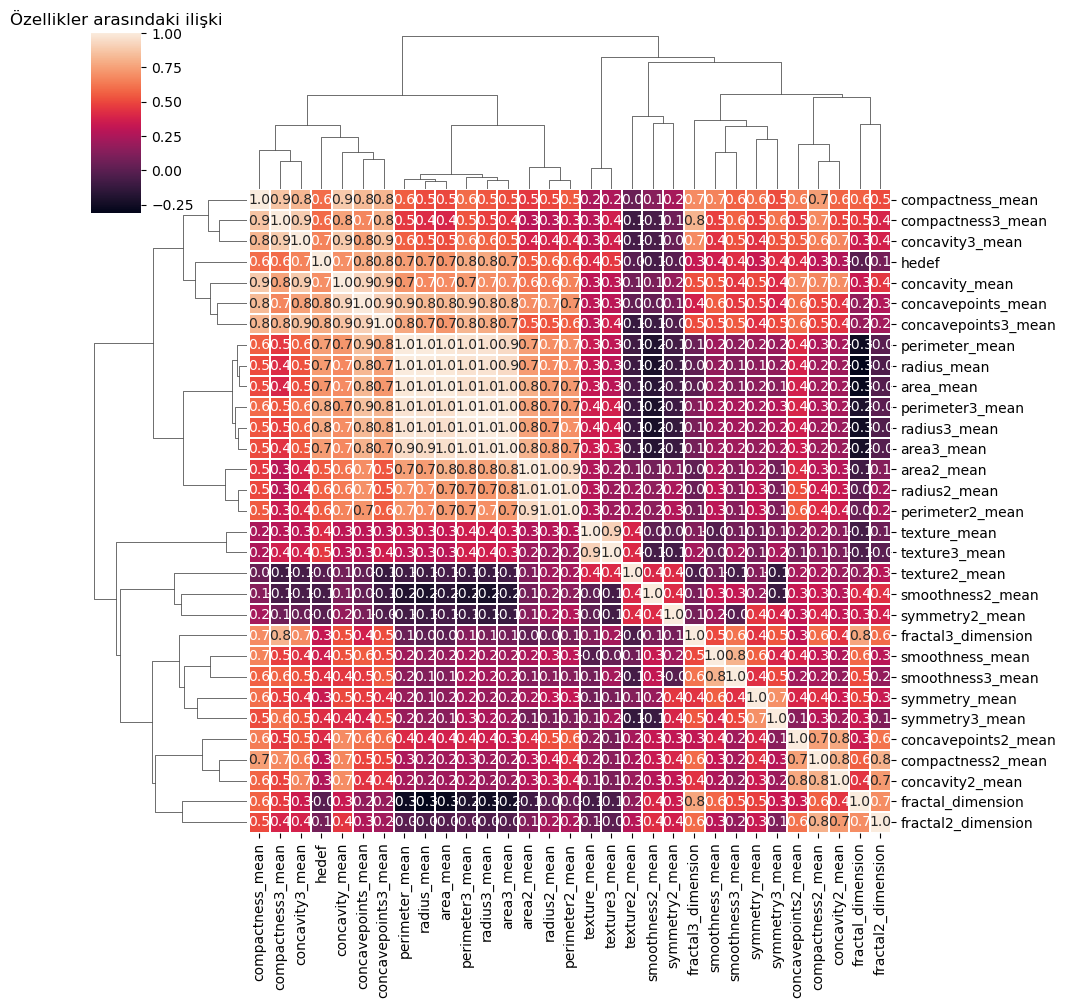

In [11]:
#Verinin içerisinde bulunan değerlerin arasındaki ilişkiye bakalım
corr_matrix=veri.corr()
plt.figure(figsize=(12,8))
sns.clustermap(corr_matrix,annot=True,fmt=".1f",linewidths=.01)
plt.title("Özellikler arasındaki ilişki")
plt.show()

<Figure size 640x480 with 0 Axes>

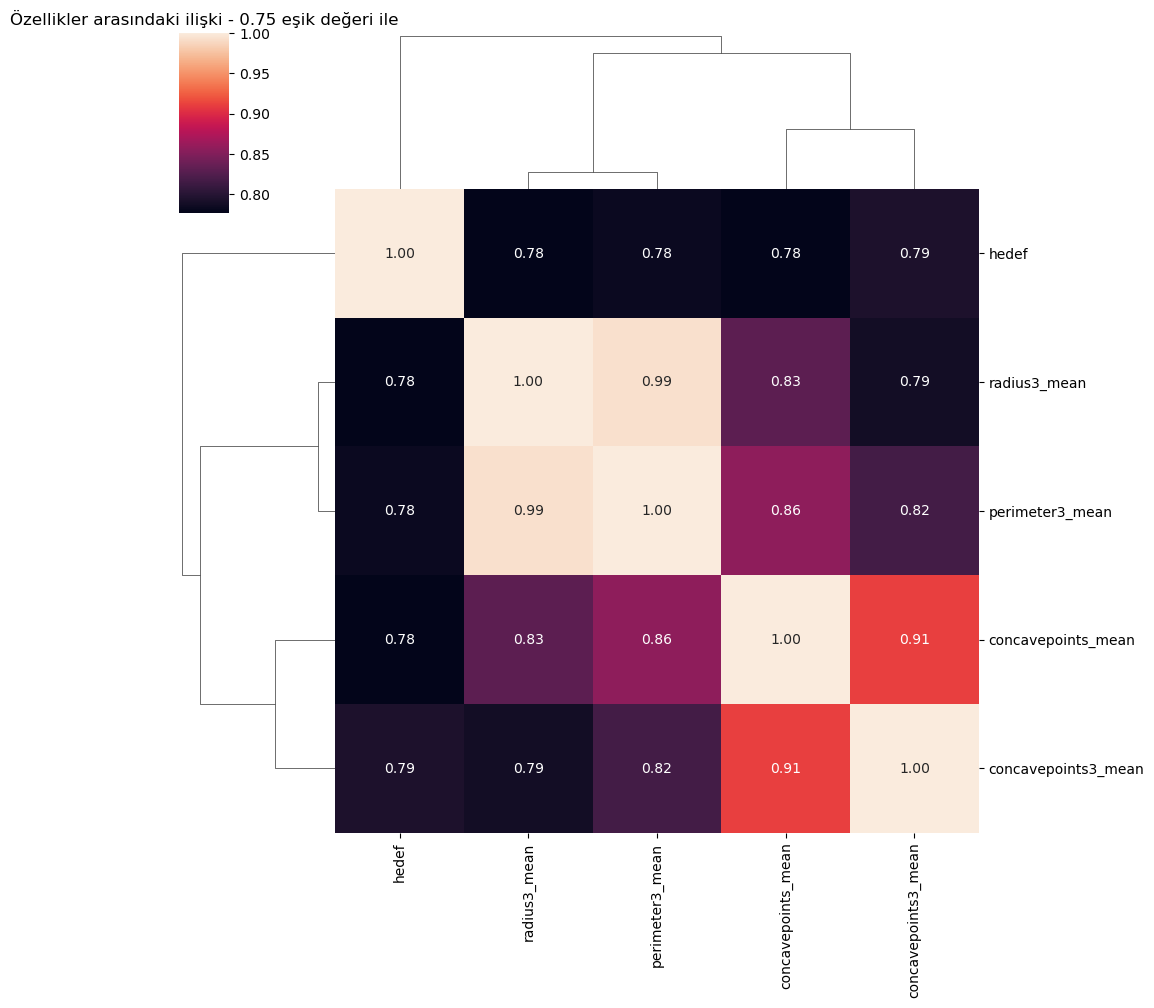

In [12]:
#hedef ile arasındaki ilişki artı/eksi 0.75den büyük olanlara ayrıca göz atalım.
threshold=0.75
filtre=np.abs(corr_matrix["hedef"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(),annot=True, fmt=".2f")
plt.title("Özellikler arasındaki ilişki - 0.75 eşik değeri ile")
plt.show()

Buradan kanser hücresinin sınıfını belirlemede radius3_mean, perimeter3_mean, concavepoints_mean, concavepoint3_mean özelliklerinin etkili olduğu gözükmektedir.

<Figure size 640x480 with 0 Axes>

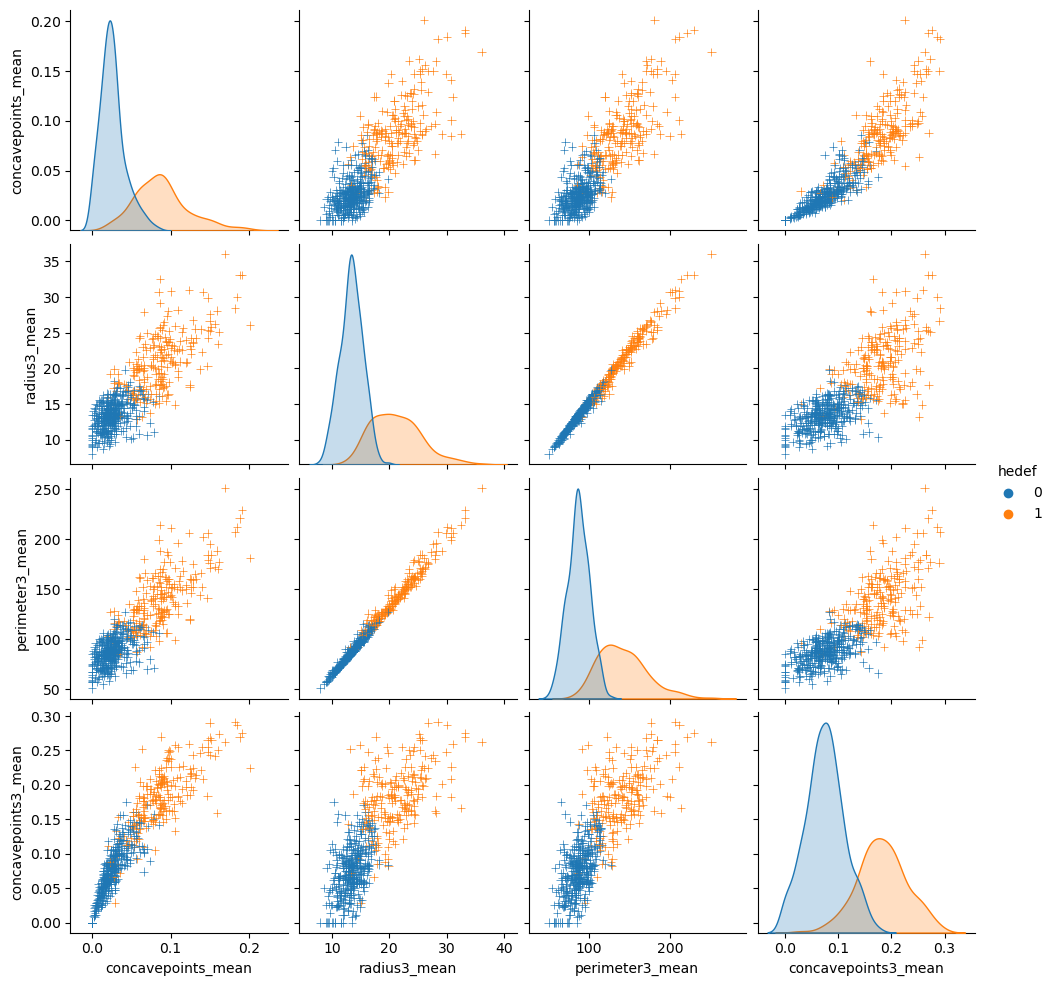

In [13]:
#hedef ile ilişkili özelliklerin saçılımına bakalım
plt.figure()
sns.pairplot(veri[corr_features],diag_kind="kde",markers="+",hue="hedef")
plt.show()

**Aykırı Değer Tespiti ve Çıkarılması**
- Yerel aykırı değer faktör algoritması, belirli bir veri noktasının komşularına göre yerel yoğunluk sapmasını hesaplayan denetimsiz bir aykırı değer algılama yöntemidir.
- Komşularından önemli ölçüde daha düşük yoğunluğa sahip örnekleri aykıır değerler olarak kabul eder.

In [14]:
y=veri.hedef
x=veri.drop(["hedef"],axis=1)
columns=x.columns.tolist()

In [15]:
#yerel aykırı faktör yöntemi
clf=LocalOutlierFactor()

#yerel aykırı faktör yöntemi uygulayalım
y_pred=clf.fit_predict(x)

X_score=clf.negative_outlier_factor_

In [16]:
#skoru bir veri çerçevesi yapıp içerisine ekleyelim.
outlier_score=pd.DataFrame()
outlier_score["score"]=X_score


In [17]:
#belirli bir eşik değerine göre aykırı değerleri bulalım
threshold=-2.2
filtre=outlier_score["score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

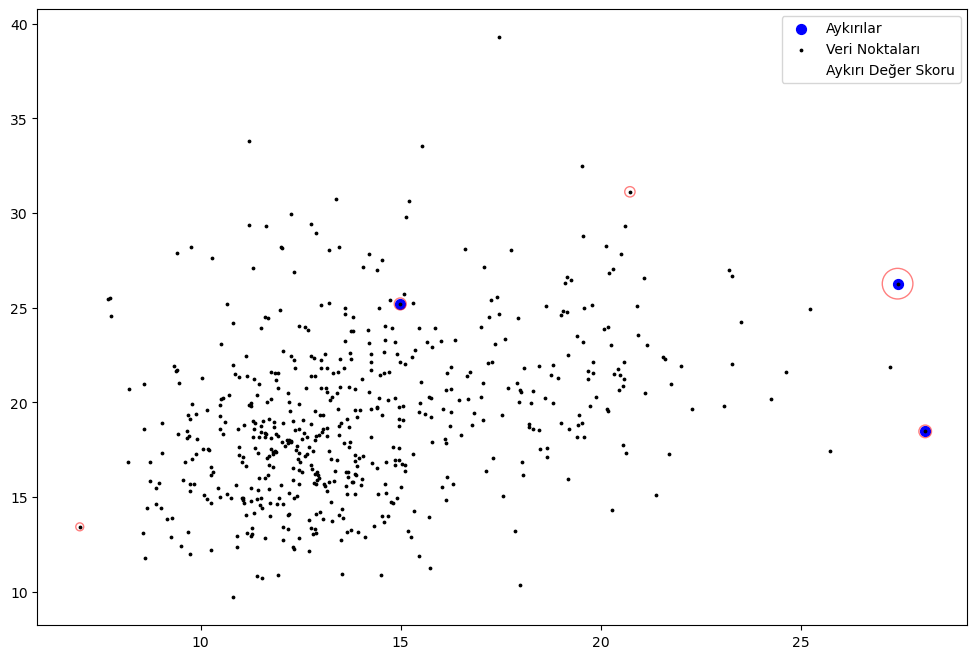

In [18]:
#belirlenen aykırı değerleri çıkaralım

plt.figure(figsize=(12,8))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Aykırılar")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Veri Noktaları")
radius=(X_score.max()-X_score/(X_score.max()-X_score.min()))

outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",alpha=0.5,facecolors="none",label="Aykırı Değer Skoru")
plt.legend()
plt.show()


In [19]:
#aykırı değerleri çıkaralım
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

**Eğitim ve Test Veri Seti Bölünmesi**

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Standardizasyon**
- Standardizasyon işlemi, veriyi sıfır ortalamalı, 1 standart sapmalı hale getirme işlemidir.

    Z= (X-Ortalama)/ StandartSapma
- Standardizasyon işleminde bulunan ortalama ve standart sapma değerlerini eğitim veri setine göre buluyoruz. Sonrasında hem eğitim veri setine hem de test veri setine uygulayacağız.
- Veriyi sıfır ortalama ve 1 standart sapmalı hale getirdikten sonra kutu grafiğine göz atabiliriz.


In [21]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
#görselleştirmede kullanmak için veri çerçevesi oluşturalım
x_train_df=pd.DataFrame(x_train,columns=columns)
x_train_df_describe=x_train_df.describe()
x_train_df["hedef"]=y_train

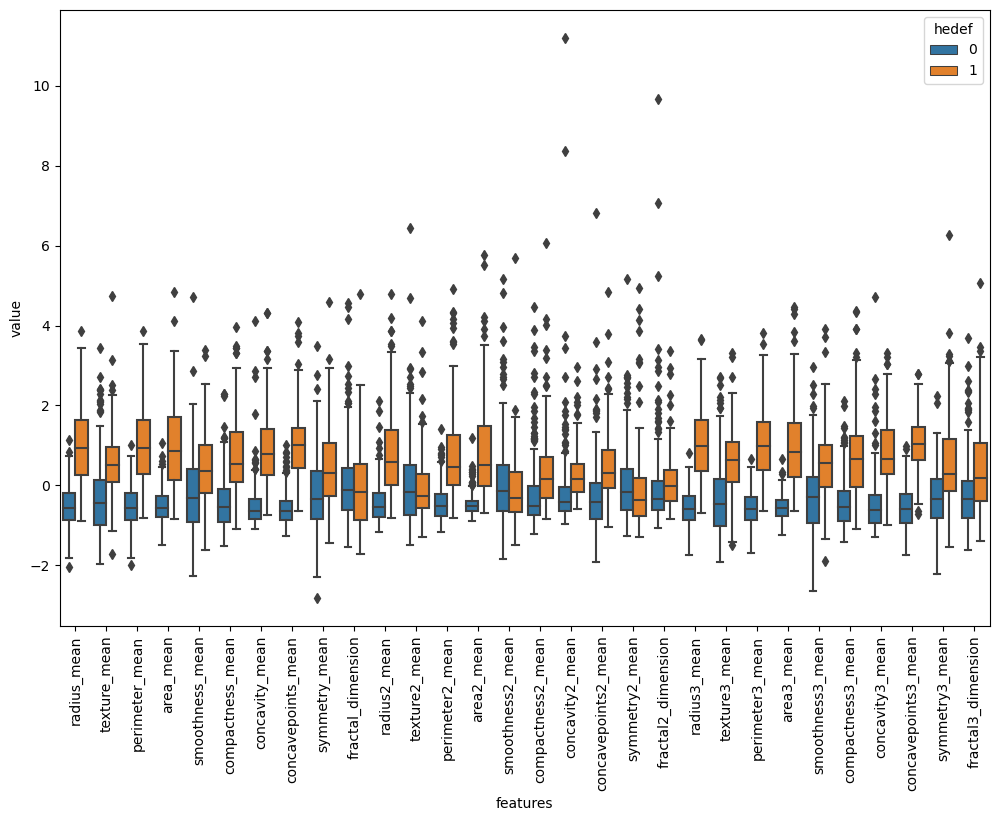

In [23]:
data_melted=pd.melt(x_train_df,id_vars="hedef",var_name="features",value_name="value")
plt.figure(figsize=(12,8))
sns.boxplot(x="features",y="value",hue="hedef",data=data_melted)
plt.xticks(rotation=90)
plt.show()

**K-En Yakın Komşu**

In [24]:
knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
y_pred=knn.predict(x_test)

Karışıklık Matrisi:  [[102   0]
 [ 11  57]]


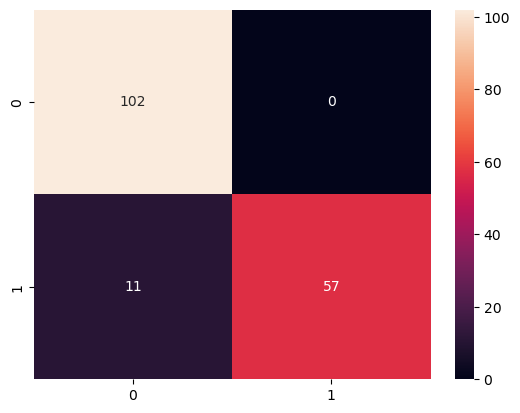

In [26]:
cm=confusion_matrix(y_test,y_pred)
print("Karışıklık Matrisi: ",cm)
plt.figure()
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [27]:
acc=accuracy_score(y_test,y_pred)
print("acc: ",acc)

acc:  0.9352941176470588


In [28]:
# en iyi k değeri

def TheBestParams(x_train,x_test,y_train,y_test):
    #k değeri
    k_range=list(range(1,31))
    #"uniform": tek tip ağırlıklar, tüm noktalar eşit olarak ağırlıklandırılmaktadır.
    #"distance" mesafelerin tersine göre ağırlık noktaları. 
    weight_options=["uniform","distance"]
    
    #ızgara araması için parametreleri bir sözlük içerisine ekleyelim
    param_grid=dict(n_neighbors=k_range, weights=weight_options)

    #knn sınıflandırıcı
    knn=KNeighborsClassifier()
    #çapraz doğrulama ile ızgara arama
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    #eğitim
    grid.fit(x_train,y_train)


    #en iyi sonucu veren parametrelerin gösterimi
    print("En iyi eğitim skoru: {} ve parametreler: {}".format(grid.best_score_,grid.best_params_))

    knn.fit(x_train,y_train)

    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_train)
    
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)

    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    print("Test acc: {}, Train acc: {}".format(acc_test,acc_train))

    print("Karışıklık matrisi Test: ")
    print(cm_test)

    print("Karışıklık matrisi Train: ")
    print(cm_train)

    return grid

In [29]:
grid=TheBestParams(x_train,x_test,y_train,y_test)

En iyi eğitim skoru: 0.972051282051282 ve parametreler: {'n_neighbors': 4, 'weights': 'distance'}
Test acc: 0.9588235294117647, Train acc: 0.9772727272727273
Karışıklık matrisi Test: 
[[101   1]
 [  6  62]]
Karışıklık matrisi Train: 
[[252   3]
 [  6 135]]


**Temel Bileşenler Analizi**
- Verimizi 2 temel bileşene düşürerek sınıflandırma yapacağız.


In [30]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [31]:
pca=PCA(n_components=2)

In [32]:
pca.fit(x_scaled)

PCA(n_components=2)

In [33]:
x_reduced_pca=pca.transform(x_scaled)

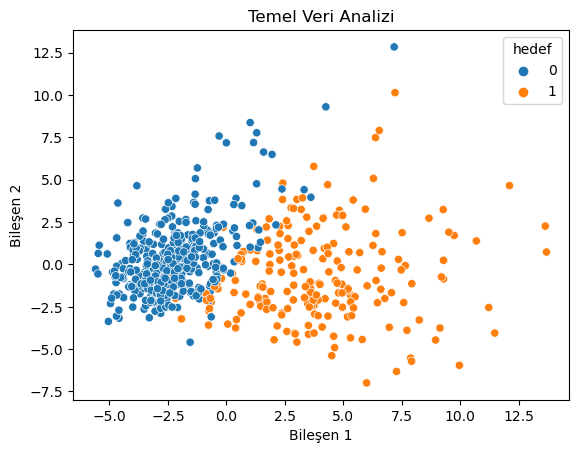

In [34]:
#pca'i yorumlamak için veri çerçevesine alalım

pca_data=pd.DataFrame(x_reduced_pca,columns=["p1","p2"])
pca_data["hedef"]=y
plt.figure()
sns.scatterplot(x="p1",y="p2",hue="hedef",data=pca_data)
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [35]:
x_train_pca, x_test_pca,y_train_pca_,y_test_pca=train_test_split(x_reduced_pca,y,test_size=0.3,random_state=42)
grid_pca=TheBestParams(x_train_pca, x_test_pca,y_train_pca_,y_test_pca)

En iyi eğitim skoru: 0.9518589743589743 ve parametreler: {'n_neighbors': 7, 'weights': 'uniform'}
Test acc: 0.9352941176470588, Train acc: 0.9595959595959596
Karışıklık matrisi Test: 
[[98  4]
 [ 7 61]]
Karışıklık matrisi Train: 
[[249   6]
 [ 10 131]]


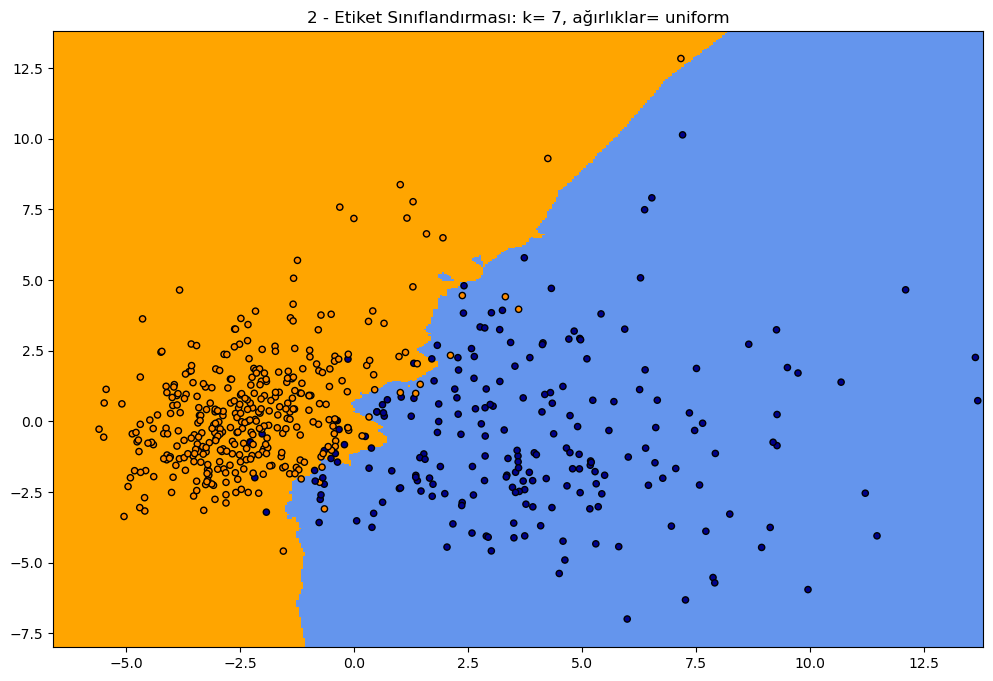

In [36]:
#pca sonucu elde edilen verinin tahminlemesi ve görselleştirilmesi
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])
h=0.05 #mesh boyutu
x=x_reduced_pca
x_min,x_max=x[:,0].min()-1, x[:,0].max()+1
y_min,y_max=x[:,1].min()-1, x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,y_max,h),
                  np.arange(y_min,y_max,h))


Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold, edgecolors="k",s=20)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("{} - Etiket Sınıflandırması: k= {}, ağırlıklar= {}".format(2,grid_pca.best_estimator_.n_neighbors,
                                                                      grid_pca.best_estimator_.weights))
plt.show()

**Komşuluk Bileşenleri Analizi**
- Komşuluk bileşenleri analizi, çok değişkenli verilerin veriler üzerinde belirli bir mesafe ölçüsüne göre farklı sınıflarda sınıflandırılması için denetimli bir öğrenme yöntemidir.

In [37]:
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)

In [38]:
nca.fit(x_scaled,y)

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [39]:
x_reduced_nca=nca.transform(x_scaled)

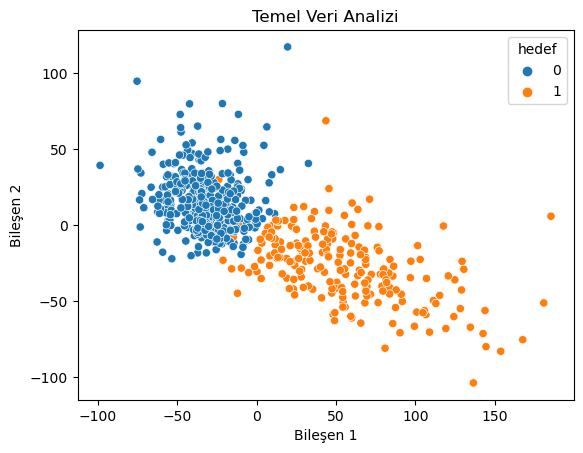

In [40]:
nca_data=pd.DataFrame(x_reduced_nca,columns=["p1","p2"])
nca_data["hedef"]=y
plt.figure()
sns.scatterplot(x="p1",y="p2",hue="hedef",data=nca_data)
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [41]:
x_train_nca, x_test_nca,y_train_nca_,y_test_nca=train_test_split(x_reduced_nca,y,test_size=0.3,random_state=42)
grid_nca=TheBestParams(x_train_nca, x_test_nca,y_train_nca_,y_test_nca)

En iyi eğitim skoru: 0.9923717948717948 ve parametreler: {'n_neighbors': 1, 'weights': 'uniform'}
Test acc: 0.9764705882352941, Train acc: 0.9924242424242424
Karışıklık matrisi Test: 
[[102   0]
 [  4  64]]
Karışıklık matrisi Train: 
[[254   1]
 [  2 139]]


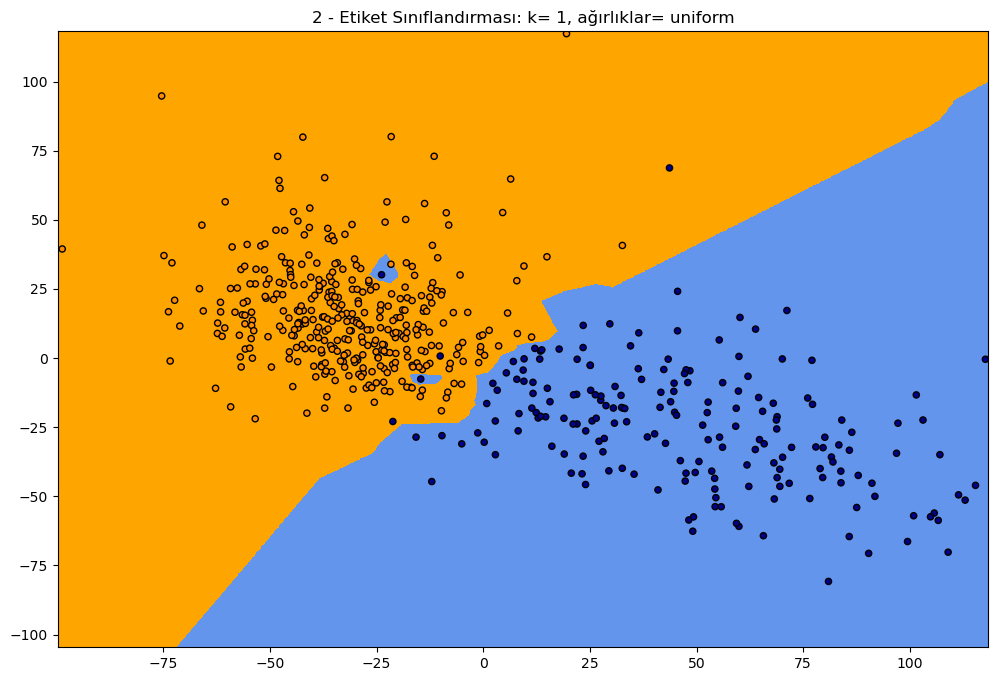

In [43]:
#nca sonucu elde edilen verinin tahminlemesi ve görselleştirilmesi
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])
h=0.2 #mesh boyutu
x=x_reduced_nca
x_min,x_max=x[:,0].min()-1, x[:,0].max()+1
y_min,y_max=x[:,1].min()-1, x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,y_max,h),
                  np.arange(y_min,y_max,h))


Z=grid_nca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold, edgecolors="k",s=20)

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("{} - Etiket Sınıflandırması: k= {}, ağırlıklar= {}".format(2,grid_nca.best_estimator_.n_neighbors,
                                                                      grid_nca.best_estimator_.weights))
plt.show()